## Training a whole network
So far, we have been training a single layer and we have been following the progress with the help of the Eager mode. If we want to train a whole network, it is much better to leave the Eager mode and to compile the graph. For this, we need to kill the notebook kernel ("Kernel" -> "Restart"). After that, we continue below in the classical TensorFlow mode.  

In [1]:
import tensorflow as tf
print('TensorFlow version '+tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.utils import to_categorical

TensorFlow version 1.12.0


**Task 12:** We will train on CIFAR10, which is contained in `keras.datasets`. Download the dataset, show a sample for each class, convert the labels to one-hot coding, and normalize the images.

In [2]:
#Loading Dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Range of data : ", "\nMAX : ", np.max(x_train), "\nMIN : ", np.min(x_train))

#normalize data
x_train = x_train/255
x_test = x_test/255

170500096/170498071 [==============================] - 9s 0us/step
Range of data :  
MAX :  255 
MIN :  0


In [3]:
(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

**Task 13:** Build the depicted LeNet5-inspired model using Keras standard components.
![title](model.png)

In [4]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, BatchNormalization, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
__________

We will now train the network. For displaying the performance we define a helper function:

In [6]:
import tensorflow.keras.backend as K
def scheduler(epoch):
    if epoch%10==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)

In [7]:
def plot_model_history(model):
    line_w = 3
    fig_size = (8, 6)
    plt.figure(0)
    plt.plot(model.history['acc'],'r', lw=line_w)
    plt.plot(model.history['val_acc'],'b', lw=line_w)
    plt.rcParams['figure.figsize'] = fig_size
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['Training','Validation'])
    plt.grid(True)

**Task 14:** Train the defined model for 50 epochs and a suitable batch size and display the result.

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
my_callbacks = [LearningRateScheduler(scheduler)] #EarlyStopping(monitor="val_acc", patience=5, mode='max')

In [9]:
hist = model.fit(x_train, y_train, batch_size=64, validation_split=0.05, epochs=50, callbacks=my_callbacks)

Train on 47500 samples, validate on 2500 samples
Epoch 1/50
47500/47500 [==============================] - 10s 212us/step - loss: 2.4978 - acc: 0.3167 - val_loss: 1.5553 - val_acc: 0.4452
Epoch 2/50
47500/47500 [==============================] - 8s 170us/step - loss: 1.8116 - acc: 0.4224 - val_loss: 1.3256 - val_acc: 0.5280
Epoch 3/50
47500/47500 [==============================] - 8s 169us/step - loss: 1.5679 - acc: 0.4836 - val_loss: 1.2830 - val_acc: 0.5460
Epoch 4/50
47500/47500 [==============================] - 8s 169us/step - loss: 1.3919 - acc: 0.5346 - val_loss: 1.1967 - val_acc: 0.5844
Epoch 5/50
47500/47500 [==============================] - 8s 170us/step - loss: 1.2626 - acc: 0.5722 - val_loss: 1.0559 - val_acc: 0.6444
Epoch 6/50
47500/47500 [==============================] - 8s 176us/step - loss: 1.1522 - acc: 0.6063 - val_loss: 0.9690 - val_acc: 0.6656
Epoch 7/50
47500/47500 [==============================] - 9s 180us/step - loss: 1.0592 - acc: 0.6333 - val_loss: 0.9676 - 

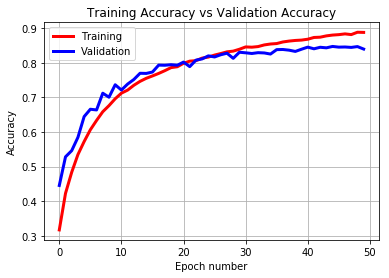

In [10]:
plot_model_history(hist)

The results can be improved in several ways, e.g., by successively reducing the learning rate (divided by two after 30 and 40 epochs), by data augmentation (`ImageDataGenerator`), and by weight regularization (see above).  
**Extra task:** Try to improve the result using one or several of the mentioned approaches.  
Hint: you need to define a suitable callback function to change the learning rate during training.

In [11]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test, batch_size=64)
print("On evaluating the model on test data :")
print("Test Loss = ", test_loss)
print("Test accuracy = ", test_acc)

10000/10000 [==============================] - 1s 54us/step
On evaluating the model on test data :
Test Loss =  0.5357113175392151
Test accuracy =  0.8282
